### Sugar vs. Normal selection strategy

30/05/2022

Test sets: 
 - system solving
 - 3-15 species biomodels

In [1]:
import matplotlib

In [2]:
matplotlib.__version__

'3.5.2'

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

some magic with sys.path in order to load rbench

In [5]:
import os
import sys
sys.path

['/home/ademin/signature-based-gb/f5/rbench-experiments/jupyter',
 '/home/ademin/anaconda3/lib/python39.zip',
 '/home/ademin/anaconda3/lib/python3.9',
 '/home/ademin/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/home/ademin/.local/lib/python3.9/site-packages',
 '/home/ademin/anaconda3/lib/python3.9/site-packages']

In [6]:
sys.path.append('/home/ademin/reduce-algebra-code/generic/rbench')

In [7]:
import rbench as rb

In [8]:
f5 = rb.read_filetree('../benchmark-results/groebner/bigsort2022-05-26', 'f5').select('boot').deselect(['heapsize', 'valid'])

In [9]:
sugarf5 = rb.read_filetree('../benchmark-results/f5/2022-05-30', 'sugarf5').select('boot').deselect(['heapsize', 'valid'])

In [10]:
f5

f5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-05-26 08:48:53+02:00     0.15    0.01   
biomodels/BIOMD0000000003 2022-05-26 08:49:09+02:00     0.01    0.01   
biomodels/BIOMD0000000006 2022-05-26 08:48:56+02:00     0.02    0.00   
biomodels/BIOMD0000000024 2022-05-26 08:48:54+02:00     0.01    0.00   
biomodels/BIOMD0000000026 2022-05-26 08:50:05+02:00     0.02    0.01   
...                                             ...      ...     ...   
standard/root7            2022-05-26 08:59:03+02:00     0.02    0.00   
standard/root8            2022-05-26 08:59:02+02:00     0.04    0.00   
standard/root9            2022-05-26 08:59:13+02:00     0.11    0.01   
standard/sparse5          2022-05-26 08:58:55+02:00     0.00    0.01   
standard/trinks           2022-05-26 08:59:04+02:00     0.05    0.01   

                                                                  
                          sigxcpu_boot                  end_boot  
biomodels/BIOMD0000000002          NaN 2022-05-26 08:48:53+02:00  
biomodels/BIOMD0000000003          NaN 2022-05-26 08:49:09+02:00  
biomodels/BIOMD0000000006          NaN 2022-05-26 08:48:57+02:00  
biomodels/BIOMD0000000024          NaN 2022-05-26 08:48:54+02:00  
biomodels/BIOMD0000000026          NaN 2022-05-26 08:50:05+02:00  
...                                ...                       ...  
standard/root7                     NaN 2022-05-26 08:59:03+02:00  
standard/root8                     NaN 2022-05-26 08:59:02+02:00  
standard/root9                     NaN 2022-05-26 08:59:14+02:00  
standard/sparse5                   NaN 2022-05-26 08:58:55+02:00  
standard/trinks                    NaN 2022-05-26 08:59:04+02:00  

[197 rows x 5 columns]

In [11]:
sugarf5

sugarf5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-05-30 00:55:12+02:00     0.51    0.01   
biomodels/BIOMD0000000003 2022-05-30 00:55:25+02:00     0.01    0.01   
biomodels/BIOMD0000000006 2022-05-30 00:55:15+02:00     0.00    0.01   
biomodels/BIOMD0000000024 2022-05-30 00:55:13+02:00     0.00    0.01   
biomodels/BIOMD0000000026 2022-05-30 00:56:02+02:00     0.03    0.00   
...                                             ...      ...     ...   
standard/root7            2022-05-30 01:05:22+02:00     0.01    0.02   
standard/root8            2022-05-30 01:05:21+02:00     0.03    0.02   
standard/root9            2022-05-30 01:05:29+02:00     0.12    0.01   
standard/sparse5          2022-05-30 01:05:14+02:00     0.00    0.02   
standard/trinks           2022-05-30 01:05:23+02:00     0.04    0.01   

                                                                  
                          sigxcpu_boot                  end_boot  
biomodels/BIOMD0000000002          NaN 2022-05-30 00:55:13+02:00  
biomodels/BIOMD0000000003          NaN 2022-05-30 00:55:26+02:00  
biomodels/BIOMD0000000006          NaN 2022-05-30 00:55:16+02:00  
biomodels/BIOMD0000000024          NaN 2022-05-30 00:55:13+02:00  
biomodels/BIOMD0000000026          NaN 2022-05-30 00:56:02+02:00  
...                                ...                       ...  
standard/root7                     NaN 2022-05-30 01:05:22+02:00  
standard/root8                     NaN 2022-05-30 01:05:21+02:00  
standard/root9                     NaN 2022-05-30 01:05:30+02:00  
standard/sparse5                   NaN 2022-05-30 01:05:14+02:00  
standard/trinks                    NaN 2022-05-30 01:05:23+02:00  

[197 rows x 5 columns]

<AxesSubplot:xlabel='wall clock time', ylabel='jobs'>

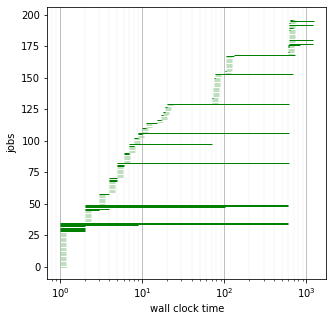

In [12]:
f5.plot.schedule()

<AxesSubplot:xlabel='wall clock time', ylabel='jobs'>

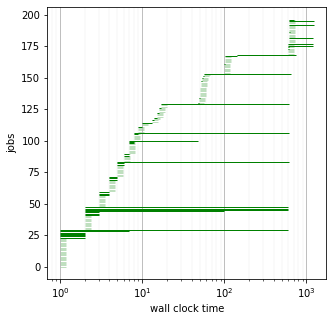

In [13]:
sugarf5.plot.schedule()

In [14]:
combo = sugarf5.join(f5, how='inner')

In [15]:
combo.head()

sugarf5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-05-30 00:55:12+02:00     0.51    0.01   
biomodels/BIOMD0000000003 2022-05-30 00:55:25+02:00     0.01    0.01   
biomodels/BIOMD0000000006 2022-05-30 00:55:15+02:00     0.00    0.01   
biomodels/BIOMD0000000024 2022-05-30 00:55:13+02:00     0.00    0.01   
biomodels/BIOMD0000000026 2022-05-30 00:56:02+02:00     0.03    0.00   

                                                                  \
                          sigxcpu_boot                  end_boot   
biomodels/BIOMD0000000002          NaN 2022-05-30 00:55:13+02:00   
biomodels/BIOMD0000000003          NaN 2022-05-30 00:55:26+02:00   
biomodels/BIOMD0000000006          NaN 2022-05-30 00:55:16+02:00   
biomodels/BIOMD0000000024          NaN 2022-05-30 00:55:13+02:00   
biomodels/BIOMD0000000026          NaN 2022-05-30 00:56:02+02:00   

                                                 f5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-05-26 08:48:53+02:00     0.15    0.01   
biomodels/BIOMD0000000003 2022-05-26 08:49:09+02:00     0.01    0.01   
biomodels/BIOMD0000000006 2022-05-26 08:48:56+02:00     0.02    0.00   
biomodels/BIOMD0000000024 2022-05-26 08:48:54+02:00     0.01    0.00   
biomodels/BIOMD0000000026 2022-05-26 08:50:05+02:00     0.02    0.01   

                                                                  
                          sigxcpu_boot                  end_boot  
biomodels/BIOMD0000000002          NaN 2022-05-26 08:48:53+02:00  
biomodels/BIOMD0000000003          NaN 2022-05-26 08:49:09+02:00  
biomodels/BIOMD0000000006          NaN 2022-05-26 08:48:57+02:00  
biomodels/BIOMD0000000024          NaN 2022-05-26 08:48:54+02:00  
biomodels/BIOMD0000000026          NaN 2022-05-26 08:50:05+02:00

#### models slower than 0.05

In [16]:
combo005 = combo.slow(0.05)

In [17]:
combo005;

In [18]:
sys.version

'3.9.12 (main, Apr  5 2022, 06:56:58) \n[GCC 7.5.0]'

In [19]:
pd.__version__

'1.4.2'

In [20]:
matplotlib.__version__

'3.5.2'

In [21]:
!which python

/home/ademin/anaconda3/bin/python


In [22]:
!/home/ademin/anaconda3/bin/pip install matplotlib==3.5.2

  Using cached matplotlib-3.5.1-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: Could not install packages due to an OSError: [Errno 16] Device or resource busy: '.nfs000000000011257600000089'



In [24]:
matplotlib.__version__

'3.5.2'

<AxesSubplot:xlabel='sugarf5', ylabel='f5'>

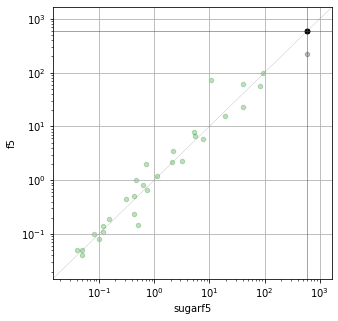

In [25]:
combo005 = combo.slow(0.05)
combo005.plot.scatter1(x='sugarf5', y='f5', c='cpu_boot')
# combo005.plot.scatter(x=('sugarf5', 'cpu_boot'), y=('f5', 'cpu_boot'))

In [26]:
combo005[combo005[('f5', 'cpu_boot')].isna()]

sugarf5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000085 2022-05-30 00:55:13+02:00      NaN     NaN   
biomodels/BIOMD0000000086 2022-05-30 00:55:16+02:00      NaN     NaN   
biomodels/BIOMD0000000102 2022-05-30 00:55:12+02:00      NaN     NaN   
biomodels/BIOMD0000000103 2022-05-30 00:55:19+02:00      NaN     NaN   
biomodels/BIOMD0000000184 2022-05-30 00:55:28+02:00      NaN     NaN   
biomodels/BIOMD0000000315 2022-05-30 00:55:13+02:00      NaN     NaN   
biomodels/BIOMD0000000447 2022-05-30 00:56:07+02:00      NaN     NaN   
biomodels/BIOMD0000000646 2022-05-30 00:55:13+02:00      NaN     NaN   
standard/hairer2          2022-05-30 01:05:20+02:00      NaN     NaN   
standard/nbody4           2022-05-30 01:05:15+02:00      NaN     NaN   
standard/nbody4sym        2022-05-30 01:05:23+02:00      NaN     NaN   
standard/nbody5           2022-05-30 01:05:31+02:00      NaN     NaN   
standard/root12           2022-05-30 00:57:34+02:00      NaN     NaN   

                                                                  \
                          sigxcpu_boot                  end_boot   
biomodels/BIOMD0000000085        600.0 2022-05-30 01:05:14+02:00   
biomodels/BIOMD0000000086        600.0 2022-05-30 01:05:17+02:00   
biomodels/BIOMD0000000102        600.0 2022-05-30 01:05:14+02:00   
biomodels/BIOMD0000000103        600.0 2022-05-30 01:05:20+02:00   
biomodels/BIOMD0000000184        600.0 2022-05-30 01:05:29+02:00   
biomodels/BIOMD0000000315        600.0 2022-05-30 01:05:14+02:00   
biomodels/BIOMD0000000447        600.0 2022-05-30 01:06:08+02:00   
biomodels/BIOMD0000000646        600.0 2022-05-30 01:05:14+02:00   
standard/hairer2                 600.0 2022-05-30 01:15:22+02:00   
standard/nbody4                  600.0 2022-05-30 01:15:15+02:00   
standard/nbody4sym               600.0 2022-05-30 01:15:35+02:00   
standard/nbody5                  600.0 2022-05-30 01:15:31+02:00   
standard/root12                  600.0 2022-05-30 01:07:36+02:00   

                                                 f5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000085 2022-05-26 08:48:54+02:00      NaN     NaN   
biomodels/BIOMD0000000086 2022-05-26 08:48:57+02:00      NaN     NaN   
biomodels/BIOMD0000000102 2022-05-26 08:48:53+02:00      NaN     NaN   
biomodels/BIOMD0000000103 2022-05-26 08:49:01+02:00      NaN     NaN   
biomodels/BIOMD0000000184 2022-05-26 08:49:12+02:00      NaN     NaN   
biomodels/BIOMD0000000315 2022-05-26 08:48:54+02:00      NaN     NaN   
biomodels/BIOMD0000000447 2022-05-26 08:50:10+02:00      NaN     NaN   
biomodels/BIOMD0000000646 2022-05-26 08:48:53+02:00      NaN     NaN   
standard/hairer2          2022-05-26 08:59:01+02:00      NaN     NaN   
standard/nbody4           2022-05-26 08:58:57+02:00      NaN     NaN   
standard/nbody4sym        2022-05-26 08:59:04+02:00      NaN     NaN   
standard/nbody5           2022-05-26 08:59:15+02:00      NaN     NaN   
standard/root12           2022-05-26 08:51:02+02:00      NaN     NaN   

                                                                  
                          sigxcpu_boot                  end_boot  
biomodels/BIOMD0000000085        600.0 2022-05-26 08:58:56+02:00  
biomodels/BIOMD0000000086        600.0 2022-05-26 08:58:58+02:00  
biomodels/BIOMD0000000102        600.0 2022-05-26 08:58:55+02:00  
biomodels/BIOMD0000000103        600.0 2022-05-26 08:59:02+02:00  
biomodels/BIOMD0000000184        600.0 2022-05-26 08:59:13+02:00  
biomodels/BIOMD0000000315        600.0 2022-05-26 08:58:56+02:00  
biomodels/BIOMD0000000447        600.0 2022-05-26 09:00:11+02:00  
biomodels/BIOMD0000000646        600.0 2022-05-26 08:58:56+02:00  
standard/hairer2                 600.0 2022-05-26 09:09:03+02:00  
standard/nbody4                  600.0 2022-05-26 09:08:57+02:00  
standard/nbody4sym               600.0 2022-05-26 09:09:0

In [27]:
combo005[combo005[('sugarf5', 'cpu_boot')].isna()]

sugarf5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000085 2022-05-30 00:55:13+02:00      NaN     NaN   
biomodels/BIOMD0000000086 2022-05-30 00:55:16+02:00      NaN     NaN   
biomodels/BIOMD0000000102 2022-05-30 00:55:12+02:00      NaN     NaN   
biomodels/BIOMD0000000103 2022-05-30 00:55:19+02:00      NaN     NaN   
biomodels/BIOMD0000000184 2022-05-30 00:55:28+02:00      NaN     NaN   
biomodels/BIOMD0000000315 2022-05-30 00:55:13+02:00      NaN     NaN   
biomodels/BIOMD0000000447 2022-05-30 00:56:07+02:00      NaN     NaN   
biomodels/BIOMD0000000646 2022-05-30 00:55:13+02:00      NaN     NaN   
standard/hairer2          2022-05-30 01:05:20+02:00      NaN     NaN   
standard/henrion6         2022-05-30 01:05:14+02:00      NaN     NaN   
standard/nbody4           2022-05-30 01:05:15+02:00      NaN     NaN   
standard/nbody4sym        2022-05-30 01:05:23+02:00      NaN     NaN   
standard/nbody5           2022-05-30 01:05:31+02:00      NaN     NaN   
standard/root12           2022-05-30 00:57:34+02:00      NaN     NaN   

                                                                  \
                          sigxcpu_boot                  end_boot   
biomodels/BIOMD0000000085        600.0 2022-05-30 01:05:14+02:00   
biomodels/BIOMD0000000086        600.0 2022-05-30 01:05:17+02:00   
biomodels/BIOMD0000000102        600.0 2022-05-30 01:05:14+02:00   
biomodels/BIOMD0000000103        600.0 2022-05-30 01:05:20+02:00   
biomodels/BIOMD0000000184        600.0 2022-05-30 01:05:29+02:00   
biomodels/BIOMD0000000315        600.0 2022-05-30 01:05:14+02:00   
biomodels/BIOMD0000000447        600.0 2022-05-30 01:06:08+02:00   
biomodels/BIOMD0000000646        600.0 2022-05-30 01:05:14+02:00   
standard/hairer2                 600.0 2022-05-30 01:15:22+02:00   
standard/henrion6                600.0 2022-05-30 01:15:14+02:00   
standard/nbody4                  600.0 2022-05-30 01:15:15+02:00   
standard/nbody4sym               600.0 2022-05-30 01:15:35+02:00   
standard/nbody5                  600.0 2022-05-30 01:15:31+02:00   
standard/root12                  600.0 2022-05-30 01:07:36+02:00   

                                                 f5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000085 2022-05-26 08:48:54+02:00      NaN     NaN   
biomodels/BIOMD0000000086 2022-05-26 08:48:57+02:00      NaN     NaN   
biomodels/BIOMD0000000102 2022-05-26 08:48:53+02:00      NaN     NaN   
biomodels/BIOMD0000000103 2022-05-26 08:49:01+02:00      NaN     NaN   
biomodels/BIOMD0000000184 2022-05-26 08:49:12+02:00      NaN     NaN   
biomodels/BIOMD0000000315 2022-05-26 08:48:54+02:00      NaN     NaN   
biomodels/BIOMD0000000447 2022-05-26 08:50:10+02:00      NaN     NaN   
biomodels/BIOMD0000000646 2022-05-26 08:48:53+02:00      NaN     NaN   
standard/hairer2          2022-05-26 08:59:01+02:00      NaN     NaN   
standard/henrion6         2022-05-26 08:58:56+02:00   221.11     0.0   
standard/nbody4           2022-05-26 08:58:57+02:00      NaN     NaN   
standard/nbody4sym        2022-05-26 08:59:04+02:00      NaN     NaN   
standard/nbody5           2022-05-26 08:59:15+02:00      NaN     NaN   
standard/root12           2022-05-26 08:51:02+02:00      NaN     NaN   

                                                                  
                          sigxcpu_boot                  end_boot  
biomodels/BIOMD0000000085        600.0 2022-05-26 08:58:56+02:00  
biomodels/BIOMD0000000086        600.0 2022-05-26 08:58:58+02:00  
biomodels/BIOMD0000000102        600.0 2022-05-26 08:58:55+02:00  
biomodels/BIOMD0000000103        600.0 2022-05-26 08:59:02+02:00  
biomodels/BIOMD0000000184        600.0 2022-05-26 08:59:13+02:00  
biomodels/BIOMD0000000315        600.0 2022-05-26 08:58:56+02:00  
biomodels/BIOMD0000000447        600.0 2022-05-26 09:00:11+02:00  
biomodels/BIOMD0000000646        600.0 2022-05

In [28]:
combo.slow(0.5)

sugarf5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-05-30 00:55:12+02:00     0.51    0.01   
biomodels/BIOMD0000000038 2022-05-30 00:56:04+02:00     2.12    0.00   
biomodels/BIOMD0000000046 2022-05-30 00:55:21+02:00     2.18    0.01   
biomodels/BIOMD0000000085 2022-05-30 00:55:13+02:00      NaN     NaN   
biomodels/BIOMD0000000086 2022-05-30 00:55:16+02:00      NaN     NaN   
biomodels/BIOMD0000000102 2022-05-30 00:55:12+02:00      NaN     NaN   
biomodels/BIOMD0000000103 2022-05-30 00:55:19+02:00      NaN     NaN   
biomodels/BIOMD0000000108 2022-05-30 00:55:12+02:00     5.33    0.02   
biomodels/BIOMD0000000123 2022-05-30 00:55:13+02:00    95.19    0.01   
biomodels/BIOMD0000000166 2022-05-30 00:55:13+02:00     0.72    0.01   
biomodels/BIOMD0000000184 2022-05-30 00:55:28+02:00      NaN     NaN   
biomodels/BIOMD0000000315 2022-05-30 00:55:13+02:00      NaN     NaN   
biomodels/BIOMD0000000447 2022-05-30 00:56:07+02:00      NaN     NaN   
biomodels/BIOMD0000000637 2022-05-30 00:55:24+02:00     1.13    0.01   
biomodels/BIOMD0000000646 2022-05-30 00:55:13+02:00      NaN     NaN   
biomodels/BIOMD0000000759 2022-05-30 00:55:18+02:00    40.53    0.01   
biomodels/BIOMD0000000769 2022-05-30 00:55:17+02:00     0.43    0.00   
standard/cassou           2022-05-30 01:05:22+02:00    10.64    0.01   
standard/eco7             2022-05-30 01:05:21+02:00     0.47    0.01   
standard/hairer2          2022-05-30 01:05:20+02:00      NaN     NaN   
standard/henrion5         2022-05-30 00:56:53+02:00    40.67    0.01   
standard/henrion6         2022-05-30 01:05:14+02:00      NaN     NaN   
standard/katsura6         2022-05-30 01:05:17+02:00     3.18    0.01   
standard/kinema           2022-05-30 01:05:21+02:00    19.65    0.02   
standard/nbody4           2022-05-30 01:05:15+02:00      NaN     NaN   
standard/nbody4sym        2022-05-30 01:05:23+02:00      NaN     NaN   
standard/nbody5           2022-05-30 01:05:31+02:00      NaN     NaN   
standard/noon6            2022-05-30 01:05:21+02:00     0.74    0.01   
standard/noon7            2022-05-30 01:05:14+02:00     7.76    0.01   
standard/noon8            2022-05-30 01:05:33+02:00    84.56    0.01   
standard/root10           2022-05-30 01:05:30+02:00     0.63    0.01   
standard/root11           2022-05-30 01:05:14+02:00     5.56    0.01   
standard/root12           2022-05-30 00:57:34+02:00      NaN     NaN   

                                                                  \
                          sigxcpu_boot                  end_boot   
biomodels/BIOMD0000000002          NaN 2022-05-30 00:55:13+02:00   
biomodels/BIOMD0000000038          NaN 2022-05-30 00:56:06+02:00   
biomodels/BIOMD0000000046          NaN 2022-05-30 00:55:24+02:00   
biomodels/BIOMD0000000085        600.0 2022-05-30 01:05:14+02:00   
biomodels/BIOMD0000000086        600.0 2022-05-30 01:05:17+02:00   
biomodels/BIOMD0000000102        600.0 2022-05-30 01:05:14+02:00   
biomodels/BIOMD0000000103        600.0 2022-05-30 01:05:20+02:00   
biomodels/BIOMD0000000108          NaN 2022-05-30 00:55:18+02:00   
biomodels/BIOMD0000000123          NaN 2022-05-30 00:56:50+02:00   
biomodels/BIOMD0000000166          NaN 2022-05-30 00:55:14+02:00   
biomodels/BIOMD0000000184        600.0 2022-05-30 01:05:29+02:00   
biomodels/BIOMD0000000315        600.0 2022-05-30 01:05:14+02:00   
biomodels/BIOMD0000000447        600.0 2022-05-30 01:06:08+02:00   
biomodels/BIOMD0000000637          NaN 2022-05-30 00:55:25+02:00   
biomodels/BIOMD0000000646        600.0 2022-05-30 01:05:14+02:00   
biomodels/BIOMD0000000759          NaN 2022-05-30 00:55:59+02:00   
biomodels/BIOMD0000000769          NaN 2022-05-30 00:55:17+02:00   
standard/cassou                    NaN 2022-05-30 01:05:33+02:00   
standard/eco7                      NaN 2022-05-30 01:05:21+02:00   
standard/hairer2                 600.0 2022-05-30 01:15:22+02:00   
standard/henrion5          

In [29]:
combo005.dropna(subset=[('sugarf5', 'cpu_boot'), ('f5', 'cpu_boot')]).describe()

sugarf5                                 f5                        
        cpu_boot    gc_boot sigxcpu_boot   cpu_boot    gc_boot sigxcpu_boot
count  29.000000  29.000000          0.0  29.000000  29.000000          0.0
mean   11.153793   0.010000          NaN  12.678621   0.011034          NaN
std    24.306418   0.004629          NaN  25.926391   0.006732          NaN
min     0.040000   0.000000          NaN   0.040000   0.000000          NaN
25%     0.150000   0.010000          NaN   0.150000   0.010000          NaN
50%     0.720000   0.010000          NaN   1.030000   0.010000          NaN
75%     5.560000   0.010000          NaN   6.750000   0.020000          NaN
max    95.190000   0.020000          NaN  99.510000   0.020000          NaN